In [1]:
from import_functions_generic import * 
from import_functions_plotting import * 

import vip_hci as vip
from vip_hci.fm import scattered_light_disk

In [228]:
#plt.style.use('classic')  

rcParams.update({#'font.size': 14,  'axes.labelsize' : 14, 'legend.fontsize' : 12,
#"font.family": "serif", 'text.usetex' : True, "font.serif": [], "font.sans-serif": [],
'legend.handlelength': 1.4, 'legend.borderaxespad' : 1.2, 'legend.columnspacing' : 1, 'legend.handletextpad' : 0.5})

rcParams['mathtext.fontset'] = 'stix'

In [3]:
L = time.localtime()
date = "{}-{}-{}".format(L[0],L[1],L[2],L[3],L[4],L[5])

saving_dir = 'figs/fig_v{}/'.format(date)
os.makedirs(saving_dir,exist_ok=True)

In [10]:
fontsize_text = 14

# I. Functions 

In [11]:
def SPF(phi, g=0.5, mode='HG_1g', polar=False):
    if mode == 'HG_1g':
        #print(mode)
        SPF = HG_1g(phi, g)
    elif mode == '1':
        SPF = 1
    else: raise ValueError('The input mode ({}) is not available.'.format(mode))
    if polar: 
        SPF *= (1-(np.cos(phi))**2) / (1+(np.cos(phi))**2)
    return SPF
    
def HG_1g(phi, g=0.5):
    fact = 1/(4*np.pi) 
    return fact * (1-g**2) / (1-2*g*np.cos(phi)+g**2)**(3/2)

# II. Plot Scattering Phase Function - Examples

## Henyey Greenstein

### - Total intensity

In [12]:
PHI = np.linspace(0,np.pi,100)
g = 0.9
mode = 'HG_1g'
polar = False

namesave = 'SPF_TI_1g.pdf'

SPF_TI = np.array([ SPF(phi, g, mode=mode, polar=polar) for phi in PHI])

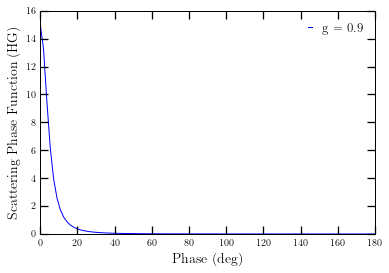

In [13]:
fig, ax = plt.subplots(1,1)
ax.plot(PHI*180/np.pi, SPF_TI, label='g = {}'.format(g))
ax.set_ylabel('Scattering Phase Function (HG)')
ax.set_xlabel('Phase (deg)')
ax.legend(loc='upper right', frameon=False)
plt.show()

##### Consider several g

In [14]:
PHI = np.linspace(0,np.pi,180)
G = [0.3,0.5,0.7 ,0.9, -0.7]
mode = 'HG_1g'
polar = False
colors = ['mediumseagreen', 'teal', 'royalblue', 'palevioletred',  'gold',  [0., 0.3, 0.6]]

namesave = 'SPF_TI_several_g.pdf'


Normalized at angle 1 deg


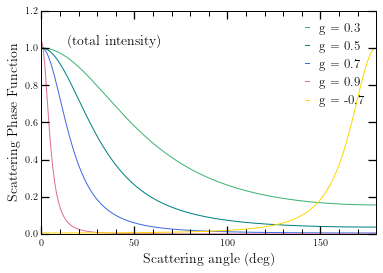

In [15]:
# Figure
fig, ax = plt.subplots(1,1)#, figsize=figsize)
for i in range(len(G)):
    g = G[i]
    SPF_ti = np.array([ SPF(phi, g, mode=mode, polar=polar) for phi in PHI])
    
    # Normalization
    if i != len(G)-1: X1_idx_normf = 1
    else: X1_idx_normf = 180-1
    if i==0: print('Normalized at angle {:.0f} deg'.format(PHI[X1_idx_normf]*180/np.pi))
    SPF_ti = SPF_ti/SPF_ti[X1_idx_normf]
  
    ax.plot(PHI*180/np.pi, SPF_ti, label='g = {}'.format(g), color=colors[i])
    
ax.text(0.08, 0.85, '(total intensity)', transform=ax.transAxes, fontsize=fontsize_text) #Rayleigh polarised fraction
ax.set_ylabel('Scattering Phase Function')
ax.set_xlabel('Scattering angle (deg)')
ax.legend(loc='upper right', frameon=False)
ax.set_xlim([0,180])
#ax.set_yscale('log')
mise_en_page(ax, x_step=1, x_maj_step=50, x_min_step=10)
plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

### - Polar (Rayleigh polarised fraction)

In [16]:
PHI = np.linspace(0,np.pi,100)
g = 0.9
mode = 'HG_1g'
polar = True

namesave = 'SPF_polar_1g.pdf'

SPF_polar = np.array([ SPF(phi, g, mode=mode, polar=polar) for phi in PHI])

##### Fixed 1 g

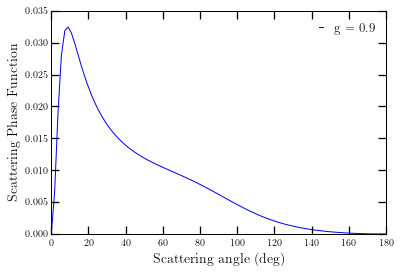

In [17]:
fig, ax = plt.subplots(1,1)
ax.plot(PHI*180/np.pi, SPF_polar, label='g = {}'.format(g))
ax.set_ylabel('Scattering Phase Function')
ax.set_xlabel('Scattering angle (deg)')
ax.legend(loc='upper right', frameon=False)

plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

##### Consider several g

In [18]:
PHI = np.linspace(0,np.pi,180)
G = [0,0.3,0.5,0.7,0.9, -0.3]
mode = 'HG_1g'
polar = True
# Initialization
colors = ['mediumseagreen', 'teal', 'royalblue', 'palevioletred',  'crimson', 'gold',  [0., 0.3, 0.6]]

figsize = (5.2,3)
namesave = 'SPF_polar_several_g.pdf'

Normalized at angle 10 deg


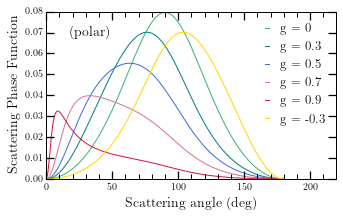

In [20]:
fig, ax = plt.subplots(1,1, figsize=figsize)
for i in range(len(G)):
    g = G[i]
    SPF_polar = np.array([ SPF(phi, g, mode=mode, polar=polar) for phi in PHI])
    
    # Normalization
    if i != len(G)-1: X1_idx_normf = 10
    else: X1_idx_normf = 90
    if i==0: print('Normalized at angle {:.0f} deg'.format(PHI[X1_idx_normf]*180/np.pi))
    #SPF_polar = SPF_polar/SPF_polar[X1_idx_normf]
  
    ax.plot(PHI*180/np.pi, SPF_polar, label='g = {}'.format(g), color=colors[i])
    
ax.text(0.08, 0.85, '(polar)', transform=ax.transAxes, fontsize=fontsize_text) #Rayleigh polarised fraction
ax.set_ylabel('Scattering Phase Function')
ax.set_xlabel('Scattering angle (deg)')
ax.legend(loc='upper right', frameon=False)
ax.set_xlim([0,220])
mise_en_page(ax, x_step=1, x_maj_step=50, x_min_step=10)
plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

### - Only Rayleigh scattering

In [21]:
PHI = np.linspace(0,np.pi,100)
mode = '1' # only Rayleigh scattering
polar = True

figsize = (4,3)
namesave = 'SPF_only_Rayleigh.pdf'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


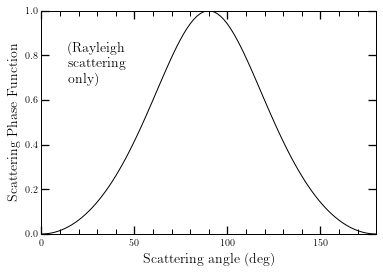

In [22]:
fig, ax = plt.subplots(1,1)#, figsize=figsize)

SPF_R = np.array([ SPF(phi, g, mode=mode, polar=polar) for phi in PHI])
ax.plot(PHI*180/np.pi, SPF_R, color='black') #, label='g = {}'.format(g))
    
ax.text(0.08, 0.68, '(Rayleigh \nscattering\nonly)', transform=ax.transAxes, fontsize=fontsize_text) #Rayleigh polarised fraction
ax.set_ylabel('Scattering Phase Function')
ax.set_xlabel('Scattering angle (deg)')
ax.legend(loc='upper right', frameon=False)
ax.set_xlim([0,180])

mise_en_page(ax, x_step=1, x_maj_step=50, x_min_step=10)
plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

# III. Plot Scattering Phase Function - Solutions

## Henyey Greenstein

### - Total intensity

In [23]:
# Consider several g
PHI = np.linspace(0,np.pi,100)
G = [0.70, 0.75, 0.80, 0.85 , 0.90, 0.95]
mode = 'HG_1g'
polar = False
colors = ['mediumseagreen', 'teal', 'royalblue', 'palevioletred',  'crimson',  'gold',  [0., 0.3, 0.6]]

namesave = 'SPF_TI_several_g.pdf'

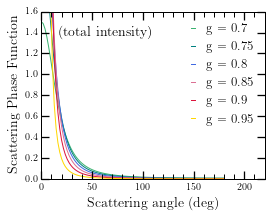

In [25]:
fig, ax = plt.subplots(1,1, figsize=figsize)
for i in range(len(G)):
    g = G[i]
    SPF_polar = np.array([ SPF(phi, g, mode=mode, polar=polar) for phi in PHI])
    ax.plot(PHI*180/np.pi, SPF_polar, label='g = {}'.format(g), color=colors[i])
    
ax.text(0.08, 0.85, '(total intensity)', transform=ax.transAxes, fontsize=fontsize_text) #Rayleigh polarised fraction
ax.set_ylabel('Scattering Phase Function')
ax.set_xlabel('Scattering angle (deg)')
ax.legend(loc='upper right', frameon=False)
ax.set_xlim([0,220])
ax.set_ylim([0,1.6])
#ax.set_yscale('log')
mise_en_page(ax, x_step=1, x_maj_step=50, x_min_step=10)
plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

### - Polar (Rayleigh polarised fraction)

In [26]:
# Consider several g
PHI = np.linspace(0,np.pi,100)
G = [0.7, 0.75, 0.80, 0.85 , 0.90, 0.95]
mode = 'HG_1g'
polar = True
# Initialization
colors = ['mediumseagreen', 'teal', 'royalblue', 'palevioletred',  'crimson', 'gold',  [0., 0.3, 0.6]]

figsize = (5.2,3)
namesave = 'SPF_polar_several_g.pdf'

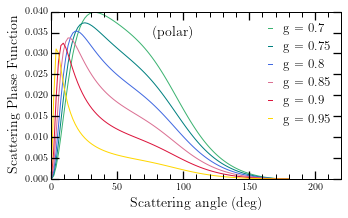

In [27]:
fig, ax = plt.subplots(1,1, figsize=figsize)
for i in range(len(G)):
    g = G[i]
    SPF_polar = np.array([ SPF(phi, g, mode=mode, polar=polar) for phi in PHI])
    ax.plot(PHI*180/np.pi, SPF_polar, label='g = {}'.format(g), color=colors[i])
    
ax.text(0.35, 0.85, '(polar)', transform=ax.transAxes, fontsize=fontsize_text) #Rayleigh polarised fraction
ax.set_ylabel('Scattering Phase Function')
ax.set_xlabel('Scattering angle (deg)')
ax.legend(loc='upper right', frameon=False)
ax.set_xlim([0,220])
mise_en_page(ax, x_step=1, x_maj_step=50, x_min_step=10)
plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

### - Compare total intensity vs polar

In [28]:
# Consider several g
PHI = np.linspace(0,np.pi,100)
G = [0.7, 0.75, 0.80, 0.85 , 0.90, 0.95]
mode = 'HG_1g'
# polar = True

# Initialization
colors = ['mediumseagreen', 'teal', 'royalblue', 'palevioletred',  'crimson', 'gold',  [0., 0.3, 0.6]]

figsize = (5.2,3)
namesave = 'SPF_ratio_several_g.pdf'

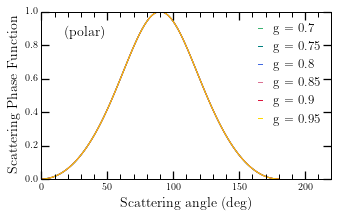

In [29]:
fig, ax = plt.subplots(1,1, figsize=figsize)
for i in range(len(G)):
    g = G[i]
    SPF_polar = np.array([ SPF(phi, g, mode=mode, polar=True) for phi in PHI])
    SPF_ti = np.array([ SPF(phi, g, mode=mode, polar=False) for phi in PHI])
    ax.plot(PHI*180/np.pi, 1*SPF_polar/SPF_ti, label='g = {}'.format(g), color=colors[i])
    
ax.text(0.08, 0.85, '(polar)', transform=ax.transAxes, fontsize=fontsize_text) #Rayleigh polarised fraction
ax.set_ylabel('Scattering Phase Function')
ax.set_xlabel('Scattering angle (deg)')
ax.legend(loc='upper right', frameon=False)
ax.set_xlim([0,220])
mise_en_page(ax, x_step=1, x_maj_step=50, x_min_step=10)
plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

ah..

# III. Data

In [206]:
# SPF in polarimetry from Olofson et al. 2022b
dF_SPF_polar = pd.read_csv('inputs/SPF_polar.txt')
dF_SPF_polar.head()

SPF_polar_extraction = dF_SPF_polar['spf']
SPF_polar_extraction_e = dF_SPF_polar['spf_e']
SPF_polar_extraction_theta = dF_SPF_polar['theta']

In [212]:
# Parameters - SPF
PHI = np.linspace(0,np.pi,100)
g_ti = 0.84
g_ti_bis = 0.80
g_polar = 0.75 #0.7
g_polar_bis = 0.80 #0.7
#g_polar_min = 0.75 #0.7
#g_polar_mid = 0.80 #0.7
#g_polar_max = 0.82 #0.7

mode = 'HG_1g'

# Parameters - Fig
color_to_hide = [0.6]*3
phi_min = 12
colors = ['mediumseagreen', 'teal', 'royalblue', 'palevioletred',  'gold', [0., 0.3, 0.6]]
color_olofsson, color_olofsson_err = 'black', [0.8,0.8,0.8] # [0., 0.3, 0.6], [0.7, 0.8, 0.9]

color_res, color_res_e = [0.2]*3, [0.9]*3
color_res_1, color_res_e_1 = colors[5], [0.5,0.5,0.99]
color_res_2, color_res_e_2 = colors[3], [0.95,0.7,0.7]

## a. Polarimetry: model vs direct extraction

**Note:** the best polarimetric model is reached for g = 0.76 but actually g = 0.7 fits better with the direct extraction from Olofsson et al. 2022b.

wanted element: 54.54545454545455 
closest element in the list L: 55.102040816326536


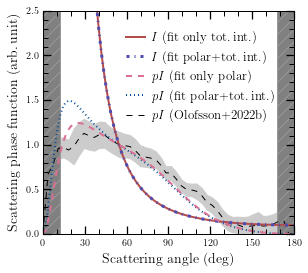

In [239]:
namesave = 'SPF_polar_g=0.82.pdf'

SPF_ti = np.array([ SPF(phi, g_ti, mode=mode, polar=False) for phi in PHI])
SPF_polar = np.array([ SPF(phi, g_polar, mode=mode, polar=True) for phi in PHI])

X1, Y1 = PHI*180/np.pi, SPF_polar
X2, Y2, Y2_err = SPF_polar_extraction_theta*180/np.pi, SPF_polar_extraction, SPF_polar_extraction_e
X3, Y3 = PHI*180/np.pi, SPF_ti


# Normalization
X1_idx_normf = 30
X2_idx_normf = index_closer(X1[X1_idx_normf], X2, display=1)
Y1_normf = Y1[X1_idx_normf]
Y2_normf = Y2[X2_idx_normf]
Y3_normf = Y3[X1_idx_normf]

Y1, Y2, Y2_err = Y1/Y1_normf, Y2/Y2_normf, Y2_err/Y2_normf 
Y3 = Y3/Y3_normf

# Bis
SPF_polar_bis = np.array([ SPF(phi, g_polar_bis, mode=mode, polar=True) for phi in PHI])
X1, Y1_bis = PHI*180/np.pi, SPF_polar_bis
Y1_normf_bis = Y1_bis[X1_idx_normf]
Y1_bis = Y1_bis/Y1_normf_bis

SPF_ti_bis = np.array([ SPF(phi, g_ti_bis, mode=mode, polar=False) for phi in PHI])
X3, Y3_bis = PHI*180/np.pi, SPF_ti_bis
Y3_normf_bis = Y3_bis[X1_idx_normf]
Y3_bis = Y3_bis/Y3_normf_bis

# Figure
fig, ax = plt.subplots(1,1, figsize=(4.5,4))

ax.plot(X3, Y3, label='$I$ (fit only tot.\,int.)', color=[0.7,0.3,0.3], lw=2, zorder=2, ls='-')
ax.plot(X3, Y3, label='$I$ (fit polar+tot.\,int.)', color=[0.3,0.3,0.7], lw=3, zorder=2, ls='-.')

#ax.plot(X1, Y1, label='$I$ (model: our work,\nfit polar+tot. int.)', color=colors[5], lw=2, zorder=2, ls='-.')

ax.plot(X1, Y1, label='$pI$ (fit only polar)', color=colors[3], lw=2, zorder=2, ls='--')
ax.plot(X1, Y1_bis, label='$pI$ (fit polar+tot.\,int.)', color=colors[5], lw=2, zorder=1.5, ls=':')

ax.plot(X2, Y2, label='$pI$ (Olofsson+2022b)~~', color=color_olofsson, zorder=1, ls='--')
Y2_min, Y2_max = Y2-Y2_err, Y2+Y2_err
ax.fill_between(X2, Y2_min, Y2_max, ls='-',color=color_olofsson_err, zorder=0)

ax.set_ylabel('Scattering phase function (arb.\,unit)')
ax.set_xlabel('Scattering angle (deg)')
ax.legend(loc='upper right', frameon=False, numpoints=1)

# lims
xlim, ylim = ax.get_xlim(), ax.get_ylim()
ylim = [0, 2.5] 
#ylim = [0, ylim[1]]
ax.fill_between([0, phi_min], 2*[ylim[1]], ls='-',  hatch='//', ec=color_to_hide, fc=[0.5]*3, zorder=0)
ax.fill_between([180-phi_min, 180], 2*[ylim[1]], ls='-', hatch='//', ec=color_to_hide, fc=[0.5]*3, zorder=0)

ax.set_ylim(ylim)

mise_en_page(ax,x_step=1,x_maj_step=30,x_min_step=10, y_step=1,y_maj_step=0.5,y_min_step=0.1)
plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

### Residuals

wanted element: 73.46938775510203 
closest element in the list L: 73.46938775510203


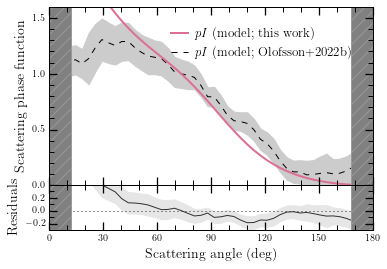

In [203]:
namesave = 'SPF_polar_with_res.pdf'

PHI = SPF_polar_extraction_theta
SPF_ti = np.array([ SPF(phi, g_ti, mode=mode, polar=False) for phi in PHI])
SPF_polar = np.array([ SPF(phi, g_polar, mode=mode, polar=True) for phi in PHI])

X1, Y1 = PHI*180/np.pi, SPF_polar
X2, Y2, Y2_err = SPF_polar_extraction_theta*180/np.pi, SPF_polar_extraction, SPF_polar_extraction_e
X3, Y3 = PHI*180/np.pi, SPF_ti

# Normalization
X1_idx_normf = 20
X2_idx_normf = index_closer(X1[X1_idx_normf], X2, display=1)
Y1_normf = Y1[X1_idx_normf]
Y2_normf = Y2[X2_idx_normf]
Y3_normf = Y3[X1_idx_normf]

Y1, Y2, Y2_err = Y1/Y1_normf, Y2/Y2_normf, Y2_err/Y2_normf 
Y3 = Y3/Y3_normf

# Y13
Y13 = Y1/Y3
# Y23 #Y3_interp = griddata(X2, Y2, X1)
Y23 = Y2/Y3
Y23_err = Y2_err/Y3


# Figure
fig, ax = plt.subplots(2,1, figsize=(5.8,4), gridspec_kw={'height_ratios': [4, 1]}, sharex=True)
fig.subplots_adjust(hspace=0)

# Main
ax[0].plot(X1, Y1, label='$pI$ (model; this work)'.format(g_polar), color=colors[3], lw=2, zorder=2)
ax[0].plot(X2, Y2, label='$pI$ (model; Olofsson+2022b)', color=color_olofsson, zorder=1, ls='--')
Y2_min, Y2_max = Y2-Y2_err, Y2+Y2_err
ax[0].fill_between(X2, Y2_min, Y2_max, ls='-',color=color_olofsson_err, zorder=0)

# Residuals
ax[1].plot(X2, Y1-Y2, label='$pI$ (model; Olofsson+2022b)\,/\,$I$ (model; this work)', color=color_res, zorder=1, ls='-')
Y2_min, Y2_max = -(Y2+Y2_err - Y1), -(Y2-Y2_err - Y1)
#color_res, color_res_e = [0.5,0.3,0.5], [0.95,0.9,0.99]
ax[1].fill_between(X2, Y2_min, Y2_max, ls='-',color=color_res_e, zorder=0.5)

ax[0].set_ylabel('Scattering phase function')
ax[1].set_ylabel('Residuals')
ax[1].set_xlabel('Scattering angle (deg)')

ax[0].legend(loc='upper right', frameon=False, numpoints=1)

color_to_hide = [0.6]*3
# lims
ylim = [0, 1.6]
ax[0].set_ylim(ylim)
ax[0].fill_between([0, phi_min], 2*[1.6], ls='-', zorder=2, hatch='//', ec=color_to_hide, fc=[0.5]*3)
ax[0].fill_between([180-phi_min, 180], 2*[1.6], ls='-', zorder=2, hatch='//', ec=color_to_hide, fc=[0.5]*3)
mise_en_page(ax[0],x_step=1,x_maj_step=30,x_min_step=10, y_step=1,y_maj_step=0.5,y_min_step=0.1)

xlim, ylim = [0,180], [-0.3, 0.39] 
ax[1].plot(xlim,[0,0],ls=':',color=[0.2]*3)
ax[1].fill_between([0, phi_min],[-10]*2, 2*[ylim[1]],  ls='-', zorder=2, hatch='//', ec=color_to_hide, fc=[0.5]*3)
ax[1].fill_between([180-phi_min, 180], 2*[ylim[1]], [-1]*2, ls='-', zorder=2, hatch='//', ec=color_to_hide, fc=[0.5]*3)
ax[1].set_ylim(ylim)
mise_en_page(ax[1],x_step=1,x_maj_step=30,x_min_step=10, y_step=1,y_maj_step=0.2,y_min_step=0.1)

plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

#### bis

wanted element: 73.46938775510203 
closest element in the list L: 73.46938775510203


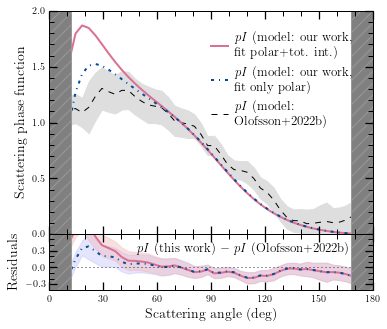

In [175]:
namesave = 'SPF_polar_with_res.pdf'

PHI = SPF_polar_extraction_theta
SPF_ti = np.array([ SPF(phi, g_ti, mode=mode, polar=False) for phi in PHI])
SPF_polar = np.array([ SPF(phi, g_polar, mode=mode, polar=True) for phi in PHI])
SPF_polar_bis = np.array([ SPF(phi, g_polar_bis, mode=mode, polar=True) for phi in PHI])

X1, Y1 = PHI*180/np.pi, SPF_polar
X1, Y1_bis = PHI*180/np.pi, SPF_polar_bis
X2, Y2, Y2_err = SPF_polar_extraction_theta*180/np.pi, SPF_polar_extraction, SPF_polar_extraction_e
X3, Y3 = PHI*180/np.pi, SPF_ti

# Normalization
X1_idx_normf = 20
X2_idx_normf = index_closer(X1[X1_idx_normf], X2, display=1)
Y1_normf = Y1[X1_idx_normf]
Y1_normf_bis = Y1_bis[X1_idx_normf]
Y2_normf = Y2[X2_idx_normf]
Y3_normf = Y3[X1_idx_normf]

Y1, Y1_bis, Y2, Y2_err = Y1/Y1_normf, Y1_bis/Y1_normf_bis, Y2/Y2_normf, Y2_err/Y2_normf 
Y3 = Y3/Y3_normf

# Y13
Y13 = Y1/Y3
# Y23 #Y3_interp = griddata(X2, Y2, X1)
Y23 = Y2/Y3
Y23_err = Y2_err/Y3

# Figure
fig, ax = plt.subplots(2,1, figsize=(5.8,5), gridspec_kw={'height_ratios': [4, 1]}, sharex=True)
fig.subplots_adjust(hspace=0)

# Main
ax[0].plot(X1, Y1_bis, label='$pI$ (model: our work,\nfit polar+tot. int.)', color=colors[3], lw=2, zorder=1.5)
ax[0].plot(X1, Y1, label='$pI$ (model: our work,\nfit only polar)', color=colors[5], lw=2, zorder=2, ls='-.')

ax[0].plot(X2, Y2, label='$pI$ (model: \nOlofsson+2022b)~~', color=color_olofsson, zorder=1, ls='--')
Y2_min, Y2_max = Y2-Y2_err, Y2+Y2_err
ax[0].fill_between(X2, Y2_min, Y2_max, ls='-',color=color_olofsson_err, zorder=0)

# Residuals
#color_res_1, color_res_e_1 = colors[5], [0.5,0.5,0.99]
#color_res_2, color_res_e_2 = colors[3], [0.95,0.7,0.7] #[0.7,0.2,0.2]
# Polar+TI
ax[1].plot(X2, Y1_bis-Y2, color=color_res_2, zorder=1, ls='-', lw=2)
Y2_min, Y2_max = -(Y2+Y2_err - Y1_bis), -(Y2-Y2_err - Y1_bis)
#color_res, color_res_e = [0.5,0.3,0.5], [0.95,0.9,0.99]
ax[1].fill_between(X2, Y2_min, Y2_max, color=color_res_e_2, zorder=0.5, alpha=0.4)

# Polar
ax[1].plot(X2, Y1-Y2, color=color_res_1, zorder=1, ls='-.', lw=2)
Y2_min, Y2_max = -(Y2+Y2_err - Y1), -(Y2-Y2_err - Y1)
#color_res, color_res_e = [0.5,0.3,0.5], [0.95,0.9,0.99]
ax[1].fill_between(X2, Y2_min, Y2_max, color=color_res_e_1, zorder=0.01, alpha=0.2)

ax[0].set_ylabel('Scattering phase function')
ax[1].set_ylabel('Residuals')
ax[1].set_xlabel('Scattering angle (deg)')

ax[0].legend(loc='upper right', frameon=False, numpoints=1)

color_to_hide = [0.6]*3
# lims
ylim = [0, 2] #[0, 1.6]
ax[0].set_ylim(ylim)
ax[0].fill_between([0, phi_min], 2*[ylim[1]], ls='-', zorder=2, hatch='//', ec=color_to_hide, fc=[0.5]*3)
ax[0].fill_between([180-phi_min, 180], 2*[ylim[1]], ls='-', zorder=2, hatch='//', ec=color_to_hide, fc=[0.5]*3)
mise_en_page(ax[0],x_step=1,x_maj_step=30,x_min_step=10, y_step=1,y_maj_step=0.5,y_min_step=0.1)

xlim, ylim = [0,180], [-0.4, 0.59] 
ax[1].plot(xlim,[0,0],ls=':',color=[0.2]*3)
ax[1].fill_between([0, phi_min],[-10]*2, 2*[ylim[1]],  ls='-', zorder=2, hatch='//', ec=color_to_hide, fc=[0.5]*3)
ax[1].fill_between([180-phi_min, 180], 2*[ylim[1]], [-1]*2, ls='-', zorder=2, hatch='//', ec=color_to_hide, fc=[0.5]*3)
ax[1].set_ylim(ylim)
mise_en_page(ax[1],x_step=1,x_maj_step=30,x_min_step=10, y_step=1,y_maj_step=0.3,y_min_step=0.1)


ax[1].text(0.27, 0.67, '$pI$ (this work) $-$ $pI$ (Olofsson+2022b) ', transform=ax[1].transAxes, fontsize=13) #Rayleigh polarised fraction

plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

In [151]:
color_olofsson_err = [0.87, 0.87, 0.87]

## b. Polarised fraction

In [197]:
# Parameters - SPF
PHI = np.linspace(0,np.pi,100)
g_ti = 0.80
g_polar = 0.80
mode = 'HG_1g'

# Parameters - Fig
color_to_hide = [0.7]*3
phi_min = 12
colors = ['mediumseagreen', 'teal', 'royalblue', 'palevioletred',  'gold',  [0., 0.3, 0.6]]

color_olofsson, color_olofsson_err = 'black', [0.8,0.8,0.8] # [0., 0.3, 0.6], [0.7, 0.8, 0.9]

color_res, color_res_e = [0.2]*3, [0.9]*3
color_res_1, color_res_e_1 = colors[5], [0.5,0.5,0.99]
color_res_2, color_res_e_2 = colors[3], [0.95,0.7,0.7]

wanted element: 73.46938775510203 
closest element in the list L: 73.46938775510203


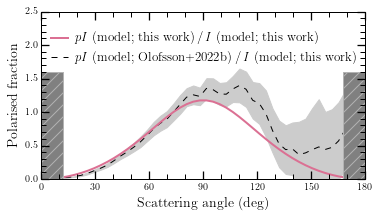

In [198]:
namesave = 'Polarised_fraction.pdf'

PHI = SPF_polar_extraction_theta
SPF_ti = np.array([ SPF(phi, g_ti, mode=mode, polar=False) for phi in PHI])
SPF_polar = np.array([ SPF(phi, g_polar, mode=mode, polar=True) for phi in PHI])

X1, Y1 = PHI*180/np.pi, SPF_polar
X2, Y2, Y2_err = SPF_polar_extraction_theta*180/np.pi, SPF_polar_extraction, SPF_polar_extraction_e
X3, Y3 = PHI*180/np.pi, SPF_ti

# Normalization
X1_idx_normf = 20
X2_idx_normf = index_closer(X1[X1_idx_normf], X2, display=1)
Y1_normf = Y1[X1_idx_normf]
Y2_normf = Y2[X2_idx_normf]
Y3_normf = Y3[X1_idx_normf]

Y1, Y2, Y2_err = Y1/Y1_normf, Y2/Y2_normf, Y2_err/Y2_normf 
Y3 = Y3/Y3_normf

# Y13
Y13 = Y1/Y3
# Y23 #Y3_interp = griddata(X2, Y2, X1)
Y23 = Y2/Y3
Y23_err = Y2_err/Y3

#color_olofsson, color_olofsson_err = [0., 0.3, 0.6], [0.7, 0.8, 0.9]
# Figure
fig, ax = plt.subplots(1,1, figsize=(5.8,3))

# Main
ax.plot(X1, Y13, label='$pI$ (model; this work)\,/\,$I$ (model; this work)'.format(g_polar), color=colors[3], lw=2, zorder=1)
ax.plot(X2, Y23, label='$pI$ (model; Olofsson+2022b)\,/\,$I$ (model; this work)', color=color_olofsson, 
           zorder=0.5, ls='--')
Y23_min, Y23_max = Y23-Y23_err, Y23+Y23_err
ax.fill_between(X3, Y23_min, Y23_max, ls='-',color=color_olofsson_err, zorder=0)

ax.set_ylabel('Polarised fraction ')
ax.set_xlabel('Scattering angle (deg)')
ax.legend(loc='upper center', frameon=False, numpoints=1)

# lims
xlim, ylim = ax.get_xlim(), ax.get_ylim()
ylim = [0, 2.5] 
ylim = [0, ylim[1]]
ax.fill_between([0, phi_min], 2*[1.6], ls='-',  hatch='//', ec=color_to_hide, fc=[0.5]*3)
ax.fill_between([180-phi_min, 180], 2*[1.6], ls='-',  hatch='//', ec=color_to_hide, fc=[0.5]*3)

ax.set_ylim(ylim)
mise_en_page(ax,x_step=1,x_maj_step=30,x_min_step=10, y_step=1,y_maj_step=0.5,y_min_step=0.1)

plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

#### Residuals

wanted element: 73.46938775510203 
closest element in the list L: 73.46938775510203


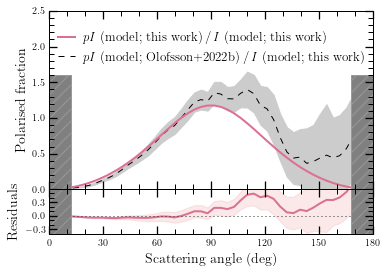

In [190]:
namesave = 'Polarised_fraction_with_res.pdf'

PHI = SPF_polar_extraction_theta
SPF_ti = np.array([ SPF(phi, g_ti, mode=mode, polar=False) for phi in PHI])
SPF_polar = np.array([ SPF(phi, g_polar, mode=mode, polar=True) for phi in PHI])

X1, Y1 = PHI*180/np.pi, SPF_polar
X2, Y2, Y2_err = SPF_polar_extraction_theta*180/np.pi, SPF_polar_extraction, SPF_polar_extraction_e
X3, Y3 = PHI*180/np.pi, SPF_ti

# Normalization
X1_idx_normf = 20
X2_idx_normf = index_closer(X1[X1_idx_normf], X2, display=1)
Y1_normf = Y1[X1_idx_normf]
Y2_normf = Y2[X2_idx_normf]
Y3_normf = Y3[X1_idx_normf]

Y1, Y2, Y2_err = Y1/Y1_normf, Y2/Y2_normf, Y2_err/Y2_normf 
Y3 = Y3/Y3_normf

# Y13
Y13 = Y1/Y3
# Y23 #Y3_interp = griddata(X2, Y2, X1)
Y23 = Y2/Y3
Y23_err = Y2_err/Y3

# Figure
fig, ax = plt.subplots(2,1, figsize=(5.8,4), gridspec_kw={'height_ratios': [4, 1]}, sharex=True)
fig.subplots_adjust(hspace=0)

# Main
ax[0].plot(X1, Y13, label='$pI$ (model; this work)\,/\,$I$ (model; this work)'.format(g_polar), color=colors[3], lw=2, zorder=1)
ax[0].plot(X2, Y23, label='$pI$ (model; Olofsson+2022b)\,/\,$I$ (model; this work)', color=color_olofsson, 
           zorder=0.5, ls='--')
Y23_min, Y23_max = Y23-Y23_err, Y23+Y23_err
ax[0].fill_between(X3, Y23_min, Y23_max, ls='-',color=color_olofsson_err, zorder=0)

# Residuals
ax[1].plot(X2, Y23-Y13, label='$pI$ (model; Olofsson+2022b)\,/\,$I$ (model; this work)', color=color_res_2, zorder=.50, ls='-', lw=2)
Y23_min, Y23_max = Y23+Y23_err - Y13, Y23-Y23_err - Y13
#color_res, color_res_e = [0.5,0.3,0.5], [0.95,0.9,0.99]
ax[1].fill_between(X3, Y23_min, Y23_max, ls='-',color=color_res_e_2, zorder=0, alpha=0.3)


ax[0].set_ylabel('Polarised fraction')
ax[1].set_ylabel('Residuals')
ax[1].set_xlabel('Scattering angle (deg)')

ax[0].legend(loc='upper center', frameon=False, numpoints=1)

color_to_hide = [0.6]*3
# lims
ylim = [0, 2.5]
ax[0].set_ylim(ylim)
ax[0].fill_between([0, phi_min], 2*[1.6], ls='-', zorder=2, hatch='//', ec=color_to_hide, fc=[0.5]*3)
ax[0].fill_between([180-phi_min, 180], 2*[1.6], ls='-', zorder=2, hatch='//', ec=color_to_hide, fc=[0.5]*3)
mise_en_page(ax[0],x_step=1,x_maj_step=30,x_min_step=10, y_step=1,y_maj_step=0.5,y_min_step=0.1)

xlim, ylim = [0,180], [-0.4, 0.59] 
ax[1].plot(xlim,[0,0],ls=':',color=[0.2]*3)
ax[1].fill_between([0, phi_min], 2*[ylim[1]], [-1]*2, ls='-', zorder=2, hatch='//', ec=color_to_hide, fc=[0.5]*3)
ax[1].fill_between([180-phi_min, 180], 2*[ylim[1]], [-1]*2, ls='-', zorder=2, hatch='//', ec=color_to_hide, fc=[0.5]*3)
ax[1].set_ylim(ylim)
mise_en_page(ax[1],x_step=1,x_maj_step=30,x_min_step=10, y_step=1,y_maj_step=0.3,y_min_step=0.1)

plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

In [202]:
# Calculer l'intégrale de la SPF polar sur la SPF total intensity

scipy.integrate.quad(lambda phi : 10 * (1-(np.cos(phi))**2) / (1+(np.cos(phi))**2), 10*np.pi/180, 80*np.pi/180)

(4.786837863523125, 5.314457611230866e-14)

In [348]:
help(ax.fill_between)

Help on method fill_between in module matplotlib.axes._axes:

fill_between(x, y1, y2=0, where=None, interpolate=False, step=None, *, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Fill the area between two horizontal curves.
    
    The curves are defined by the points (*x*, *y1*) and (*x*,
    *y2*).  This creates one or multiple polygons describing the filled
    area.
    
    You may exclude some horizontal sections from filling using *where*.
    
    By default, the edges connect the given points directly.  Use *step*
    if the filling should be a step function, i.e. constant in between
    *x*.
    
    Parameters
    ----------
    x : array (length N)
        The x coordinates of the nodes defining the curves.
    
    y1 : array (length N) or scalar
        The y coordinates of the nodes defining the first curve.
    
    y2 : array (length N) or scalar, default: 0
        The y coordinates of the nodes defining the second curve.
    
    

In [325]:
help(ax.errorbar)

Help on method errorbar in module matplotlib.axes._axes:

errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot y versus x as lines and/or markers with attached errorbars.
    
    *x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
    sizes. By default, this draws the data markers/lines as well the
    errorbars. Use fmt='none' to draw errorbars without any data markers.
    
    Parameters
    ----------
    x, y : float or array-like
        The data positions.
    
    xerr, yerr : float or array-like, shape(N,) or shape(2, N), optional
        The errorbar sizes:
    
        - scalar: Symmetric +/- values for all data points.
        - shape(N,): Symmetric +/-values for each data point.
        - shape(2, N): Separate - and + values fo

In [323]:
figsize

(5.2, 3)

In [100]:
colors

['mediumseagreen', 'teal', 'royalblue', 'palevioletred', 'crimson', 'gold']